# Kaggle Study Day 23

# CNN with Keras

https://www.kaggle.com/bugraokcu/cnn-with-keras

keras를 사용한 CNN 분류기를 학습시킨다. 전략은 분류기를 최적화하기 위해 train 데이터의 20% (12000 데이터 행)을 사용하고, 동시에 본 적 없는 데이터에서 모델 정확도를 최종적으로 평가하기 위해 test 데이터를 유지하는 것이다.

- 참고

데이터가 이미 shuffle 되어있는지 확실하지 않기 때문에, fit()의 validation_split=0.2로 설정하지 않고, 대신 그 경우 validation_split은 데이터의 마지막 20%를 사용하므로 validation data를 명시적으로 섞고 분할한다.

In [7]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('../input/fashion-mnist_train.csv')
data_test = pd.read_csv('../input/fashion-mnist_test.csv')

img_rows, img_cols = 28,28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

# 학습 도중 분류기를 최적화하기 위해 validation data를 분할
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=13)

# test data
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

# 입력 이미지 차원
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                kernel_initializer='he_normal', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

## Training

fit()으로 모델을 학습시킨다. fit()은 학습 대비 validation accuracy와 loss를 시각화하는 데 사용할 수 있는 history 객체를 반환한다.

In [11]:
history = model.fit(X_train, y_train, batch_size=batch_size,
                   epochs=epochs, verbose=1, validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 34s 177ms/step - loss: 1.1545 - accuracy: 0.5772 - val_loss: 0.4907 - val_accuracy: 0.8223
Epoch 2/50
188/188 [==============================] - 34s 182ms/step - loss: 0.5370 - accuracy: 0.7993 - val_loss: 0.3995 - val_accuracy: 0.8550
Epoch 3/50
188/188 [==============================] - 43s 231ms/step - loss: 0.4433 - accuracy: 0.8387 - val_loss: 0.3647 - val_accuracy: 0.8650
Epoch 4/50
188/188 [==============================] - 58s 310ms/step - loss: 0.3937 - accuracy: 0.8564 - val_loss: 0.3271 - val_accuracy: 0.8827
Epoch 5/50
188/188 [==============================] - 37s 199ms/step - loss: 0.3654 - accuracy: 0.8675 - val_loss: 0.3130 - val_accuracy: 0.8848
Epoch 6/50
188/188 [==============================] - 38s 205ms/step - loss: 0.3452 - accuracy: 0.8745 - val_loss: 0.3039 - val_accuracy: 0.8900
Epoch 7/50
188/188 [==============================] - 60s 320ms/step - loss: 0.3249 - accuracy: 0.8812 - val_loss: 0.2831 - val_ac

In [13]:
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.19789274036884308
Test accuracy : 0.9276999831199646


## Results

위에서 만든 분류기는 평균 정확도가 0.897인 SVM 분류기인, 여기 보고된 최적 기준선보다 더 나은 것으로 나타났다.

training과 validation loss 뿐만 아니라 accuracy도 시각화해보자.

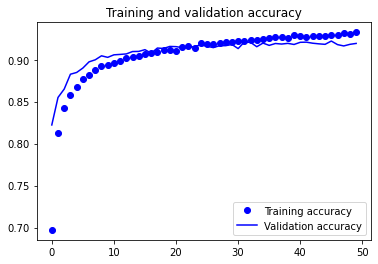

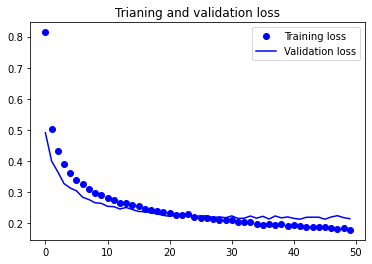

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trianing and validation loss')
plt.legend()
plt.show()

### Classification Report

분류기 성능을 요약해볼 수 있다.

In [19]:
# test 데이터로 예측
predicted_classes = model.predict_classes(X_test)

# plotting될 인덱스 얻기
y_true = data_test.iloc[:,0]
correct = np.nonzero(list(predicted_classes==y_true))[0]
incorrect = np.nonzero(list(predicted_classes!=y_true))[0]

c:\anaconda3\envs\study\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
from sklearn.metrics import classification_report
target_names = ['Calss {}'.format(i) for i in range(num_classes)]  ### num_classes : 10으로 위에서 지정
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Calss 0       0.89      0.86      0.88      1000
     Calss 1       0.99      0.99      0.99      1000
     Calss 2       0.91      0.87      0.89      1000
     Calss 3       0.93      0.94      0.94      1000
     Calss 4       0.89      0.89      0.89      1000
     Calss 5       0.99      0.99      0.99      1000
     Calss 6       0.77      0.81      0.79      1000
     Calss 7       0.97      0.96      0.96      1000
     Calss 8       0.98      0.99      0.98      1000
     Calss 9       0.96      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



분류기가 precision과 recall에서 class 6에 비해 성능이 낮은 건 분명하다. 분류기는 class 2에서 precision이 약간 부족한 반면, class 4에선 recall(즉 missed)이 약간 부족하다.

아마 correct, incorrect 예측을 시각화한 후 더 많은 인사이트를 얻을 수 있을 것이다.

다음은 올바르게 예측한 클래스의 하위집합이다.

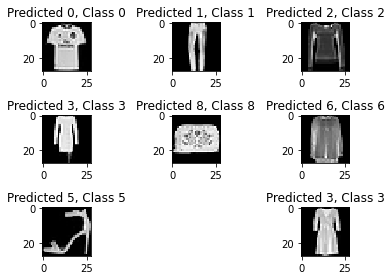

In [22]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

다음은 틀리게 예측한 클래스의 하위집합이다.

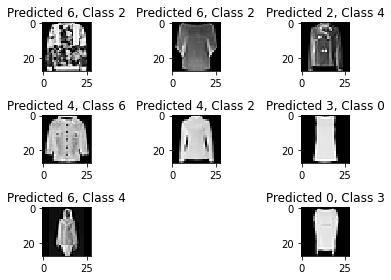

In [23]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

CNN은 robust한(이상치부터 영향받지 않는) 아키텍쳐임에도 불구하고, 여러 클래스의 다양한 유사 패턴들은 성능에 영향을 미치는 것으로 보인다. jacket, shirt, long-sleeve blouse는 롱 슬리브, 단추 등의 유사한 패턴을 갖는다.

##### What do the activations look like?

입력데이터를 제공하고 컨볼루션 레이어의 activations를 시각화한다.

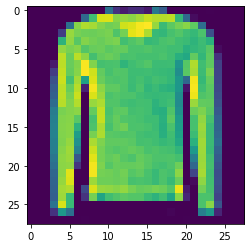

In [24]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

첫 레이어의 두번째 채널의 activation을 살펴보자.

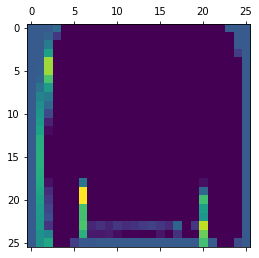

In [30]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input, layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')

또한 다른 컨볼루션 레이어의 activations를 시각화해보자.

<ipython-input-33-0eb999855d94>:17: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


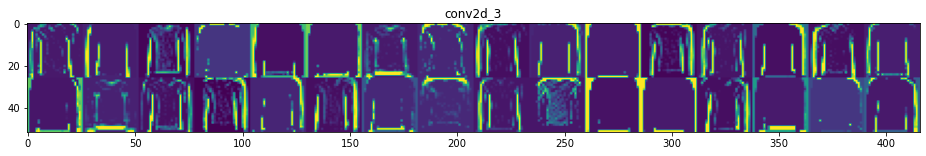

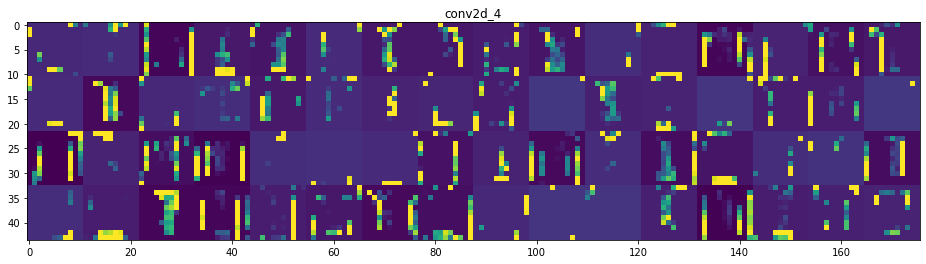

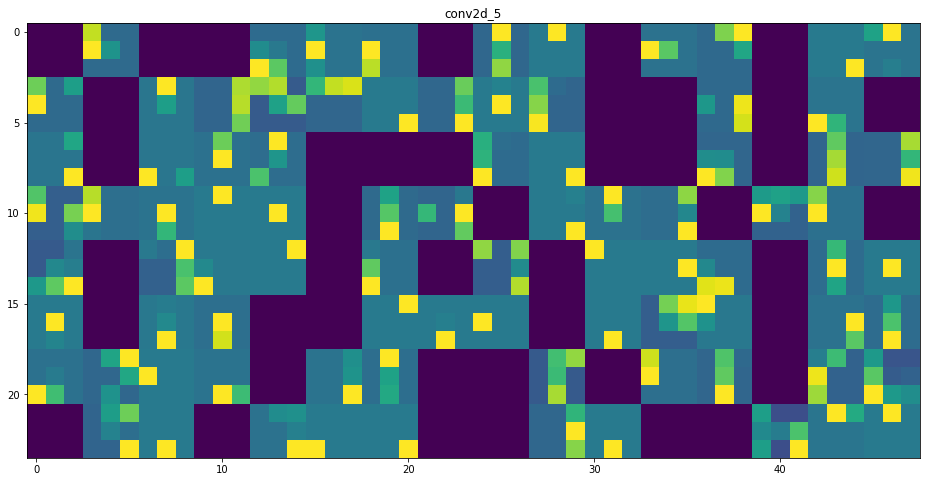

In [33]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size*n_cols, images_per_row*size))
        
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:,:,col*images_per_row+row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col*size : (col+1)*size, row*size : (row+1)*size] =channel_image
            
        scale = 1. / size
        plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')